In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("CAR _DETAILS.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
data = df.drop(columns = "name")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
df["seller_type"] = le.fit_transform(df["seller_type"])
df["transmission"] = le.fit_transform(df["transmission"])
df["owner"] = le.fit_transform(df["owner"])

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
a = df["name"]
cv = CountVectorizer()
cc = pd.DataFrame()
c = pd.DataFrame(cv.fit_transform(df["name"].fillna('')).toarray())
cc = pd.concat([cc, c],axis = 1)

In [9]:
cc

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.decomposition import PCA
p = PCA(n_components=1)
xx = p.fit_transform(cc)

In [11]:
datf = pd.DataFrame(xx)

In [12]:
y = df.iloc[:,2:3]

In [13]:
inpt = df.drop(columns=["name","selling_price"]) 

In [37]:
x = pd.concat([datf,inpt],axis=1)
x

,0,year,km_driven,fuel,seller_type,transmission,owner
0,0.696864,2007,70000,4,1,1,0
1,0.875909,2007,50000,4,1,1,0
2,-0.702905,2012,100000,1,1,1,0
3,-0.193695,2017,46000,4,1,1,0
4,-0.222585,2014,141000,1,1,1,2
...,...,...,...,...,...,...,...
4335,-0.883725,2014,80000,1,1,1,2
4336,-0.813630,2014,80000,1,1,1,2
4337,0.753165,2009,83000,4,1,1,2
4338,-0.804458,2016,90000,1,1,1,0


In [15]:
import seaborn as sns

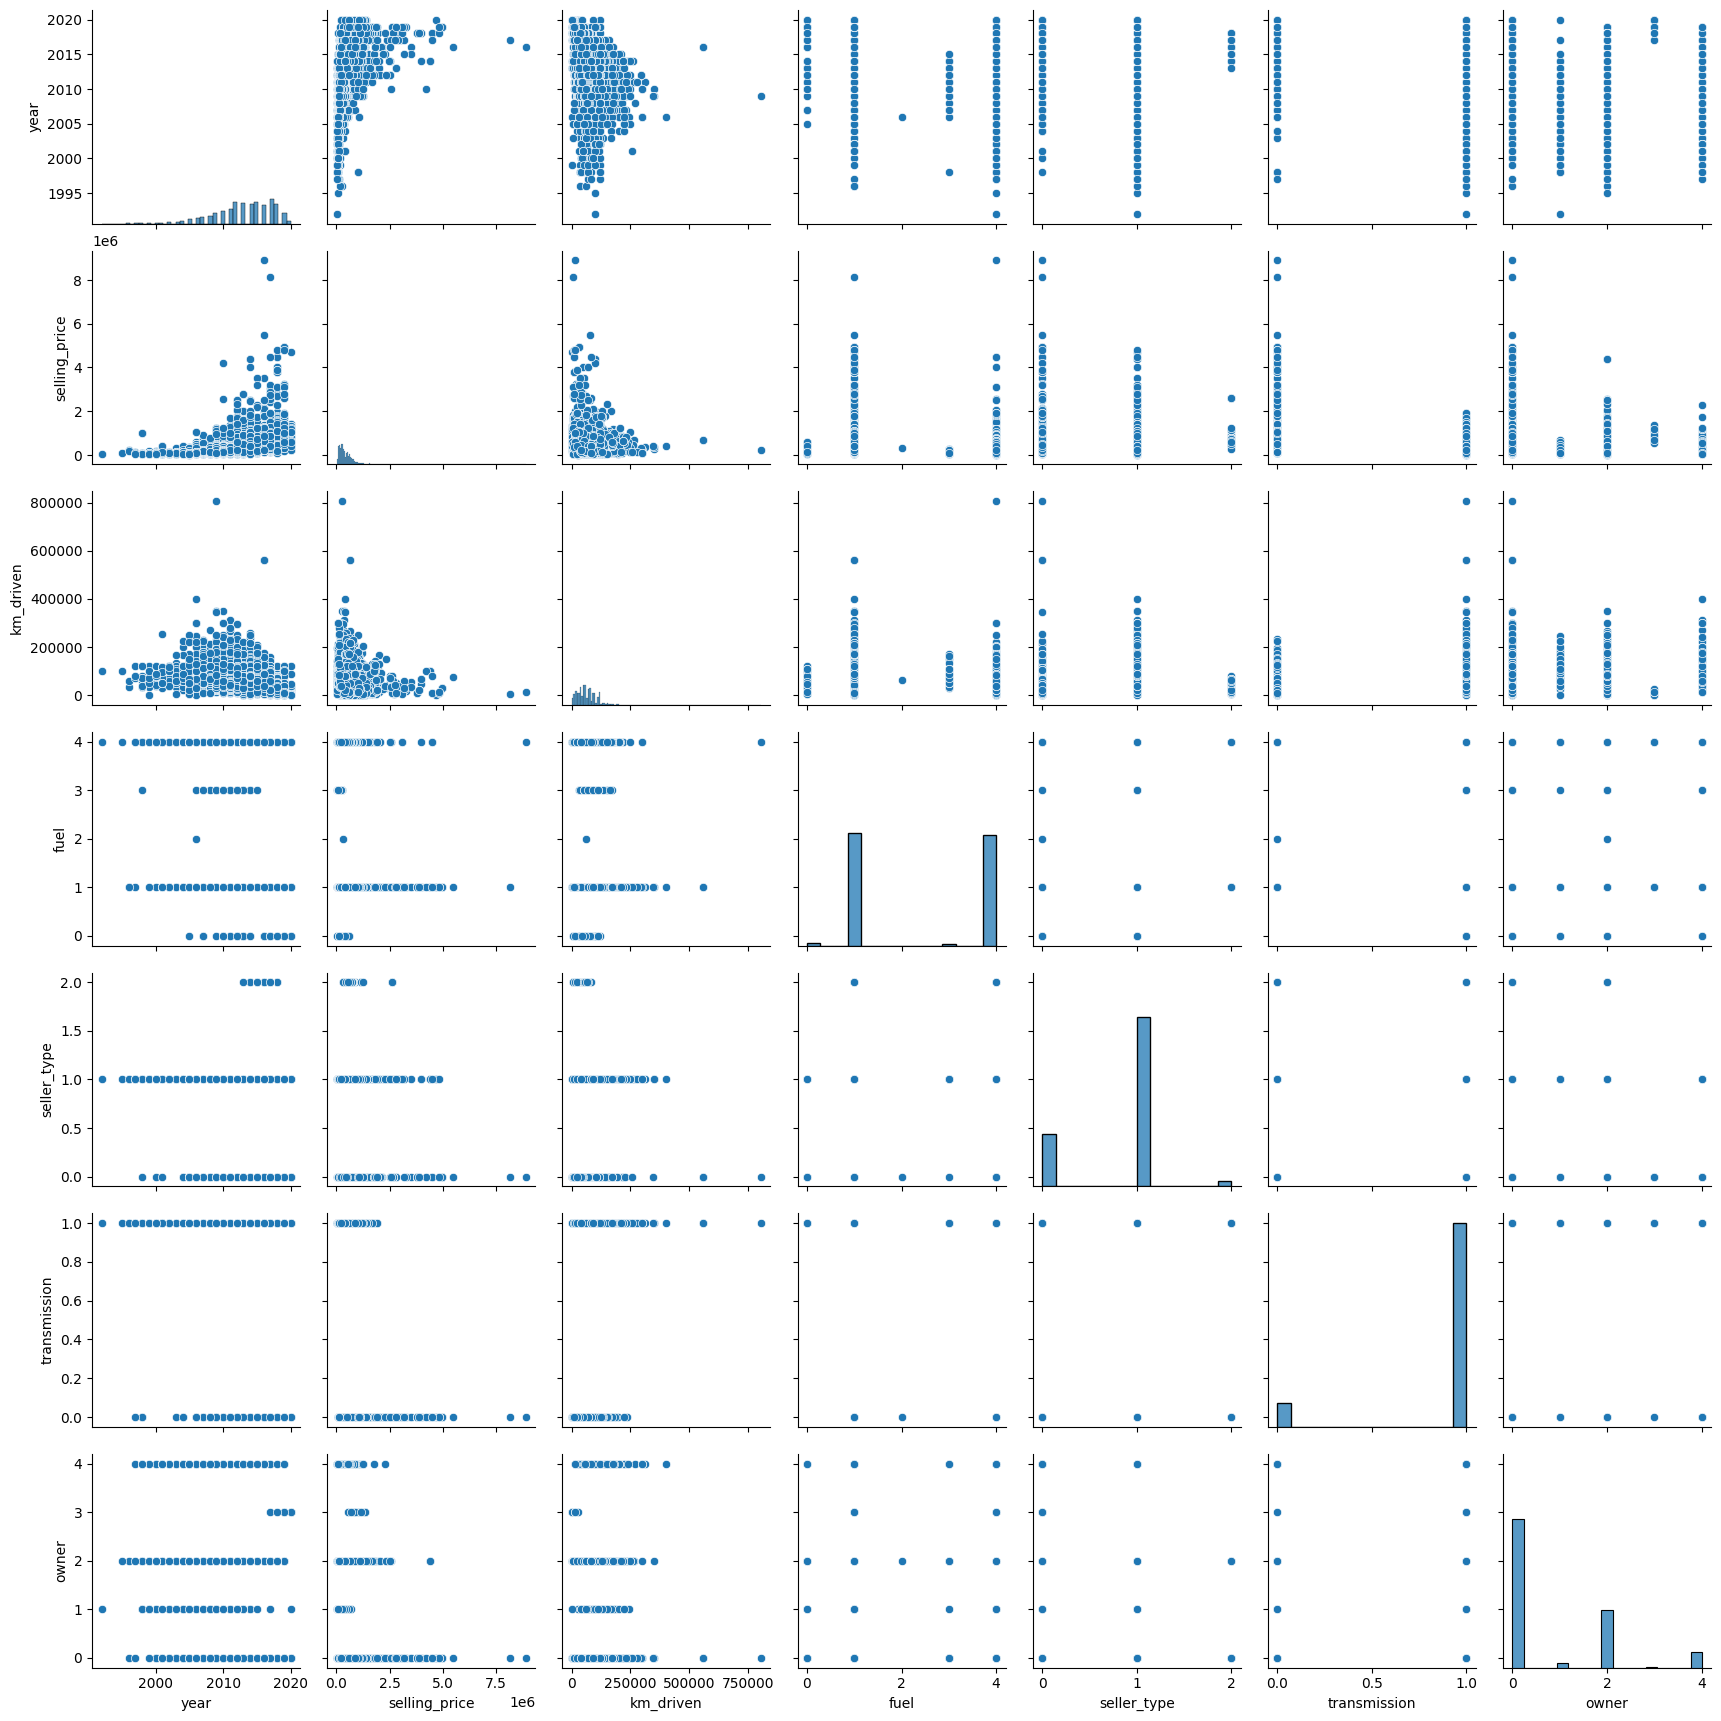

In [16]:
sns.pairplot(df)

In [17]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   0             4340 non-null   float64
 1   year          4340 non-null   int64  
 2   km_driven     4340 non-null   int64  
 3   fuel          4340 non-null   int64  
 4   seller_type   4340 non-null   int64  
 5   transmission  4340 non-null   int64  
 6   owner         4340 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 237.5 KB


In [18]:
x.rename(columns={0: "name"}, inplace=True)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=44)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
predic = lr.predict(x_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test,predic)

0.46837582404421396

In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
dtr = DecisionTreeRegressor()

In [29]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [30]:
predd = dtr.predict(x_test)

In [31]:
r2_score(y_test,predd)

0.7886310324155925

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfr = RandomForestRegressor()

In [34]:
rfr.fit(x_train,y_train)

C:\Users\pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [35]:
predict = rfr.predict(x_test)

In [36]:
r2_score(y_test,predict)

0.8579183286303551